In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression

In [7]:
training_set = pd.read_csv("../dataset/labeledTrainData.tsv",sep='\t')

Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (20000,)
No. of Testing Examples:  (5000,)


In [10]:
cv= CountVectorizer(binary=True, analyzer = 'word', min_df = 10, max_df = 0.95)

cv.fit_transform(x_test)
X_train=cv.transform(x_train) # for train data we can use fit_transfrom also.
X_test=cv.transform(x_test)

In [11]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (predicted, actual, pos_label=0, verbose=True):
    precision = precision_score(actual,predicted,pos_label=pos_label)
    recall = recall_score(actual,predicted,pos_label=pos_label)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(predicted,actual)

    if verbose:
        print('"Positive' if pos_label==1 else '"Negative','Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

In [12]:
#training our model using Logistic Regression Classifier
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)
pickle.dump(logreg, open('logreg.sav', 'wb'))
#testin and Evaluating Logistic Regression Model
preds_logreg = logreg.predict(X_test)
print('LogisticRegression: ',accuracy_score(y_test, preds_logreg))
print ('Note that {:.1%} of our classifier guesses were positive'.format(float(sum(preds_logreg))/len(y_test)))
print ('While {:.1%} of the reviews were actually positive'.format(float(sum(y_test))/len(y_test)))

do_evaluation (preds_logreg,y_test, pos_label= 1, verbose=True)
do_evaluation (preds_logreg,y_test, pos_label= 0, verbose=True)

LogisticRegression:  0.8622
Note that 50.5% of our classifier guesses were positive
While 50.0% of the reviews were actually positive
"Positive Evaluation" | Precision == 85.89 | Recall == 86.68 | Accuracy == 86.22 | F1 score == 86.28
"Negative Evaluation" | Precision == 86.56 | Recall == 85.76 | Accuracy == 86.22 | F1 score == 86.28


# save model

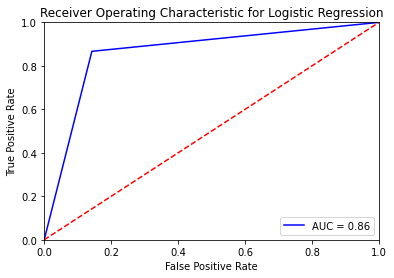

In [13]:
#for Logistic Regression Classifier

#Calculating False Positive Rate,True Positive Rate and threshold
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, preds_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()